In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
bedmap_denman = pd.read_csv("/home/kim/data/bedmap_raw_data/bedmap123_denman.csv")

In [9]:
bedmap_denman["source"].value_counts()

source
INGV_2003_Talos-Dome_AIR_BM3.csv    218405
UTIG_2010_ICECAP_AIR_BM3.csv        108845
NASA_2019_ICEBRIDGE_AIR_BM3.csv      52194
UTIG_2015_EAGLE_AIR_BM3.csv          35285
RNRF_2019_RAE_AIR_BM3.csv            13347
Name: count, dtype: int64

In [12]:
bedmap_denman["t"][::10]

0         1032.276
10        1031.940
20         990.696
30         999.768
40         984.060
            ...   
428030     139.580
428040      98.470
428050      78.720
428060      35.200
428070       0.150
Name: t, Length: 42808, dtype: float64

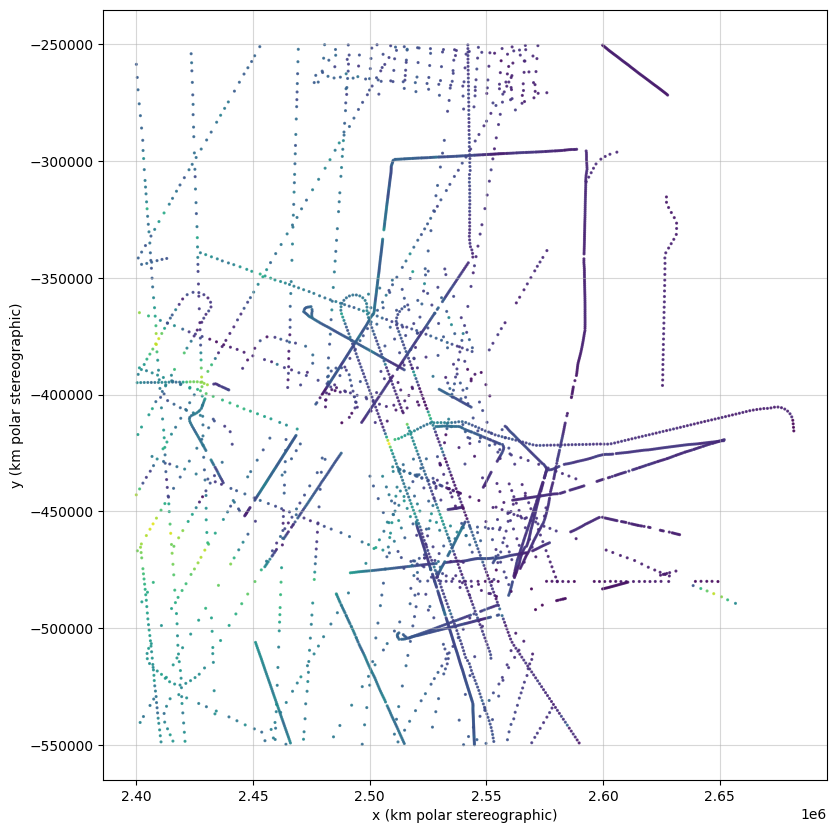

In [14]:
reduce_rate = 100
# sub-ample every 100th point to reduce the number of points for plotting
bedmap_denman_ss = bedmap_denman[::reduce_rate]

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(
    bedmap_denman_ss['x'], 
    bedmap_denman_ss['y'], 
    c = bedmap_denman_ss['t'], 
    s = 1.5, alpha = 0.8, cmap = 'viridis')

# Optional: label axes to clarify units
ax.set_xlabel("x (km polar stereographic)")
ax.set_ylabel("y (km polar stereographic)")

ax.set_aspect('equal')
ax.grid(True, alpha = 0.5)  # Show gridlines

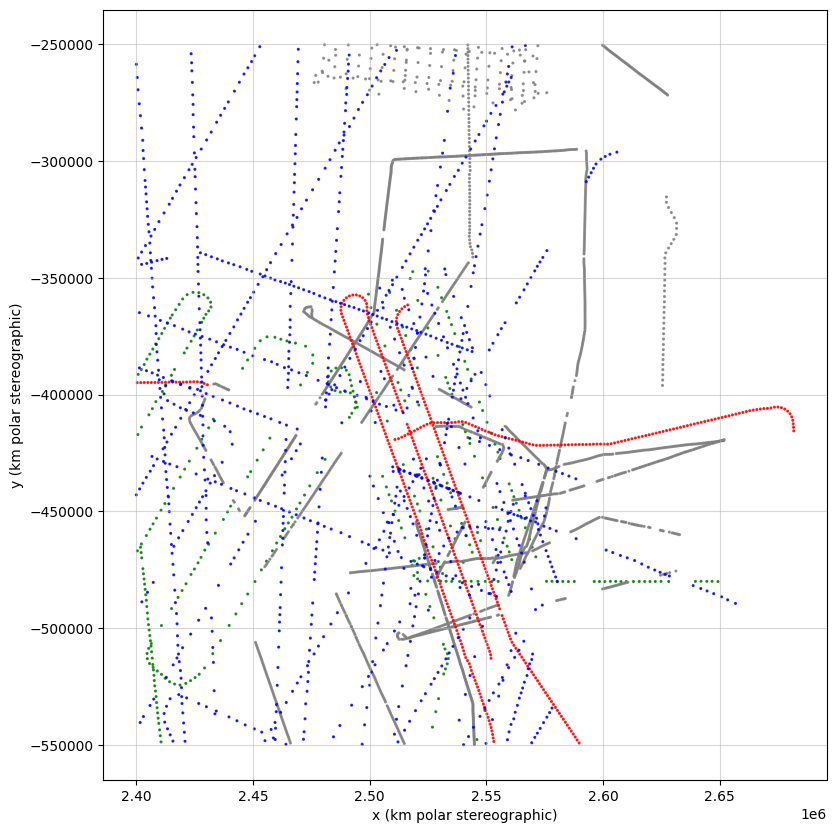

In [16]:
source_color_dict = {
    'INGV_2003_Talos-Dome_AIR_BM3.csv': "gray",
    'UTIG_2010_ICECAP_AIR_BM3.csv': "blue",
    'NASA_2019_ICEBRIDGE_AIR_BM3.csv': "red",
    'UTIG_2015_EAGLE_AIR_BM3.csv': "green",
    'RNRF_2019_RAE_AIR_BM3.csv': "grey"}

fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(
    bedmap_denman_ss['x'], 
    bedmap_denman_ss['y'],  
    s = 1.5, 
    alpha = 0.8, 
    color = bedmap_denman_ss['source'].map(source_color_dict))

# Optional: label axes to clarify units
ax.set_xlabel("x (km polar stereographic)")
ax.set_ylabel("y (km polar stereographic)")

ax.set_aspect('equal')
ax.grid(True, alpha = 0.5)  # Show gridlines

# Zoom in

In [26]:
import json
with open("denman_zoom_bounding_box.json") as f:
    bounds = json.load(f)

bedmap_denman_zoom = bedmap_denman[
    (bedmap_denman['x'] > bounds['x_min']) &
    (bedmap_denman['x'] < bounds['x_max']) &
    (bedmap_denman['y'] > bounds['y_min']) &
    (bedmap_denman['y'] < bounds['y_max'])
]

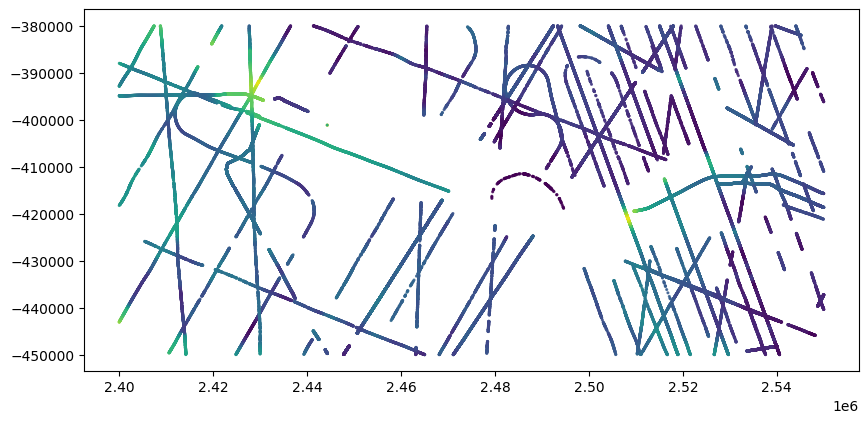

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.scatter(
    bedmap_denman_zoom['x'], 
    bedmap_denman_zoom['y'],
    c = bedmap_denman_zoom['t'],
    s = 1.5, alpha = 0.8, cmap = 'viridis')

ax.set_aspect('equal')